Topic Modeling for Research Articles로 8989개의 논문의 Title과 Abstract를 수집한 데이터

(데이터 링크: https://www.kaggle.com/datasets/blessondensil294/topicmodeling-for-research-articles/data) 

1. Abstract를 사용하여 LDA 모델링을 하고 최적의 토픽 수를 결정하기

In [134]:
import pandas as pd
import numpy as np

dt = pd.read_csv('train.csv', encoding= 'utf-8')
data = dt['ABSTRACT']

**RegExpTokenizer**

In [135]:
# 1.regexptokenizer 사용
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w]{3,}")
english_stops = set(stopwords.words('english')) 

def tokenizer_regexp(text):
    tokens = RegTok.tokenize(text.lower())
    words=[word for word in tokens if (word not in english_stops) and len(word)>2]
    return ' '.join(words)

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\장민지\AppData\Local\Temp\ipykernel_6832\2176314818.py:6: SyntaxWarning: invalid escape sequence '\w'
  RegTok = RegexpTokenizer("[\w]{3,}")


In [66]:
data_regexp = [tokenizer_regexp(doc) for doc in data]
data_regexp = [doc.split() for doc in data_regexp]
data_regexp

[['predictive',
  'models',
  'allow',
  'subject',
  'specific',
  'inference',
  'analyzing',
  'disease',
  'related',
  'alterations',
  'neuroimaging',
  'data',
  'given',
  'subject',
  'data',
  'inference',
  'made',
  'two',
  'levels',
  'global',
  'identifiying',
  'condition',
  'presence',
  'subject',
  'local',
  'detecting',
  'condition',
  'effect',
  'individual',
  'measurement',
  'extracted',
  'subject',
  'data',
  'global',
  'inference',
  'widely',
  'used',
  'local',
  'inference',
  'used',
  'form',
  'subject',
  'specific',
  'effect',
  'maps',
  'rarely',
  'used',
  'existing',
  'models',
  'often',
  'yield',
  'noisy',
  'detections',
  'composed',
  'dispersed',
  'isolated',
  'islands',
  'article',
  'propose',
  'reconstruction',
  'method',
  'named',
  'rsm',
  'improve',
  'subject',
  'specific',
  'detections',
  'predictive',
  'modeling',
  'approaches',
  'particular',
  'binary',
  'classifiers',
  'rsm',
  'specifically',
  'aims'

**PorterStemmer**

In [136]:
# 2. porterstemmer 사용
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

cachedStopWords = stopwords.words("english")
english_stops = set(stopwords.words('english'))  # 중복을 허용하지 않는 불용어 리스트

stemmer = PorterStemmer()

def tokenizer_porter(text):
    tokens = word_tokenize(text.lower())
    # 불용어 제거 및 어근 추출
    words = [stemmer.stem(word) for word in tokens if (word not in english_stops) and len(word) > 2]
    return ' '.join(words)

In [137]:
data_porter = [tokenizer_porter(doc) for doc in data]
data_porter = [doc.split() for doc in data_porter]
data_porter

[['predict',
  'model',
  'allow',
  'subject-specif',
  'infer',
  'analyz',
  'diseas',
  'relat',
  'alter',
  'neuroimag',
  'data',
  'given',
  'subject',
  'data',
  'infer',
  'made',
  'two',
  'level',
  'global',
  'i.e',
  'identifiy',
  'condit',
  'presenc',
  'subject',
  'local',
  'i.e',
  'detect',
  'condit',
  'effect',
  'individu',
  'measur',
  'extract',
  'subject',
  'data',
  'global',
  'infer',
  'wide',
  'use',
  'local',
  'infer',
  'use',
  'form',
  'subject-specif',
  'effect',
  'map',
  'rare',
  'use',
  'exist',
  'model',
  'often',
  'yield',
  'noisi',
  'detect',
  'compos',
  'dispers',
  'isol',
  'island',
  'articl',
  'propos',
  'reconstruct',
  'method',
  'name',
  'rsm',
  'improv',
  'subject-specif',
  'detect',
  'predict',
  'model',
  'approach',
  'particular',
  'binari',
  'classifi',
  'rsm',
  'specif',
  'aim',
  'reduc',
  'nois',
  'due',
  'sampl',
  'error',
  'associ',
  'use',
  'finit',
  'sampl',
  'exampl',
  'tra

In [138]:
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_texts

# 1. regexp
# dictionary
dictionary_regexp = Dictionary(data_regexp)
print("# number of initial unique words in documents:", len(dictionary_regexp))
dictionary_regexp.filter_extremes(keep_n=10000, no_below = 13, no_above = 0.5) #자주 나오는 단어 10,000, 15회 미만 삭제, 전체 문서 50% 이상 등장 단어 제거(관사, 전치사)
print("# number of initial unique words in documents:", len(dictionary_regexp))

# bag-of-words
corpus_regexp = [dictionary_regexp.doc2bow(doc) for doc in data_regexp]
print('# number of documents %d' % len(corpus_regexp))

# number of initial unique words in documents: 54451
# number of initial unique words in documents: 8745
# number of documents 20972


In [139]:
# 2. porter
# dictionary
dictionary_porter = Dictionary(data_porter)
print("# number of initial unique words in documents:", len(dictionary_porter))
dictionary_porter.filter_extremes(keep_n=10000, no_below = 8, no_above = 0.5) #자주 나오는 단어 10,000, 15회 미만 삭제, 전체 문서 50% 이상 등장 단어 제거(관사, 전치사)
print("# number of initial unique words in documents:", len(dictionary_porter))

# bag-of-words
corpus_porter = [dictionary_porter.doc2bow(doc) for doc in data_porter]
print('# number of documents %d' % len(corpus_porter))

# number of initial unique words in documents: 73230
# number of initial unique words in documents: 7804
# number of documents 20972


**model 적용(RegRxpTokenizer)**

In [108]:
from gensim.models import CoherenceModel, LdaModel

def show(corpus, dictionary, start=6, end=15, alpha='auto', eta='auto'):
    iter_num = []  
    per_value = []  
    coh_value = []  

    for i in range(start, end + 1):
        model = LdaModel(
            corpus=corpus_regexp,
            id2word=dictionary_regexp,  
            chunksize=1000, 
            num_topics=i, 
            random_state=10,
            passes=7, 
            iterations=10, 
            alpha=alpha,  
            eta=eta     
        )
        
        # 혼란도 (perplexity) 계산    
        iter_num.append(i)
        pv = model.log_perplexity(corpus_regexp)  # perplexity 값 저장
        per_value.append(pv)
        
        # 일관성 (coherence) 계산
        cm = CoherenceModel(model=model, corpus=corpus_regexp, coherence='u_mass')
        cv = cm.get_coherence()  # coherence 값 저장
        coh_value.append(cv)
        
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    return iter_num, per_value, coh_value

alpha와 eta 값을 auto로 고정 or 0.01~0.5 까지 5가지 조합으로 대입한 결과, coherence에 유의미한 변화를 보이지 않으므로 auto로 고정하였다.

passes와 iterations를 5~20까지 범위로 바꿔서 대입했지만 크게 개선되지 않았다.

In [109]:
iter_num, per_value, coh_value = show(corpus_regexp, dictionary_regexp, start=3, end=10, alpha='auto', eta='auto')

num_topics: 3, perplexity: -7.814, coherence: -1.845
num_topics: 4, perplexity: -7.769, coherence: -1.832
num_topics: 5, perplexity: -7.755, coherence: -1.812
num_topics: 6, perplexity: -7.750, coherence: -1.836
num_topics: 7, perplexity: -7.723, coherence: -1.905
num_topics: 8, perplexity: -7.748, coherence: -1.955
num_topics: 9, perplexity: -7.740, coherence: -2.003
num_topics: 10, perplexity: -7.740, coherence: -2.174


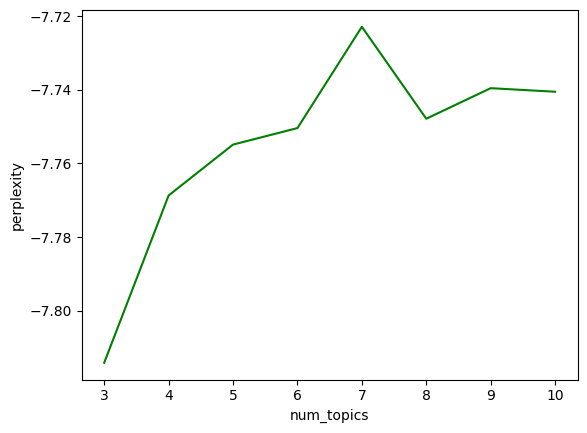

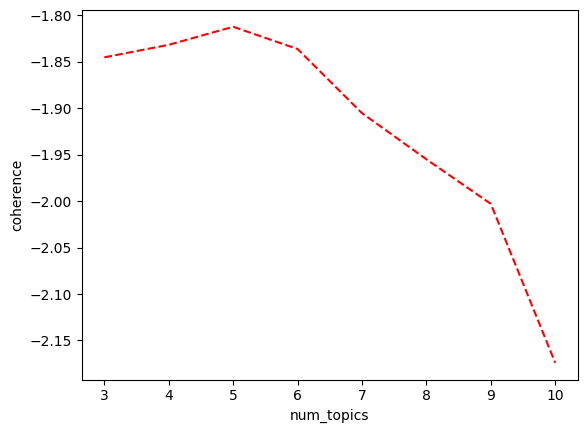

In [110]:
import matplotlib.pyplot as plt

plt.plot(iter_num, per_value, 'g-')
plt.xlabel("num_topics")
plt.ylabel("perplexity")
plt.show()

plt.plot(iter_num, coh_value, 'r--')
plt.xlabel("num_topics")
plt.ylabel("coherence")
plt.show()

**결과**

Perplexity가 가장 낮은 값은 num_topics = 3일 때 -7.814이다.

Coherence가 가장 높은 값은 num_topics = 5일 때 -1.812이다.

**모델 적용(PorterStemmer)**

In [111]:
from gensim.models import CoherenceModel, LdaModel

def show(corpus, dictionary, start=6, end=15, alpha='auto', eta='auto'):
    iter_num = []  # topic 개수 저장
    per_value = []  # perplexity 값 저장
    coh_value = []  # coherence 값 저장

    for i in range(start, end + 1):
        model = LdaModel(
            corpus=corpus_porter,
            id2word=dictionary_porter,  # 각 단어를 topic 모델이 인식할 수 있도록 변환하는 사전
            chunksize=1000, 
            num_topics=i,  # topic 수
            random_state=7,
            passes=5,
            iterations=10,
            alpha=alpha,  # alpha 값
            eta=eta     # eta 값
        )
        
        # 혼란도 (perplexity) 계산    
        iter_num.append(i)
        pv = model.log_perplexity(corpus_porter)  # perplexity 값 저장
        per_value.append(pv)
        
        # 일관성 (coherence) 계산
        cm = CoherenceModel(model=model, corpus=corpus_porter, coherence='u_mass')
        cv = cm.get_coherence()  # coherence 값 저장
        coh_value.append(cv)
        
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    return iter_num, per_value, coh_value

In [113]:
iter_num, per_value, coh_value = show(corpus_porter, dictionary_porter, start=3, end=10, alpha='auto', eta='auto')

num_topics: 3, perplexity: -7.312, coherence: -1.633
num_topics: 4, perplexity: -7.267, coherence: -1.676
num_topics: 5, perplexity: -7.236, coherence: -1.767
num_topics: 6, perplexity: -7.231, coherence: -1.695
num_topics: 7, perplexity: -7.219, coherence: -1.800
num_topics: 8, perplexity: -7.218, coherence: -1.802
num_topics: 9, perplexity: -7.223, coherence: -1.829
num_topics: 10, perplexity: -7.234, coherence: -1.932


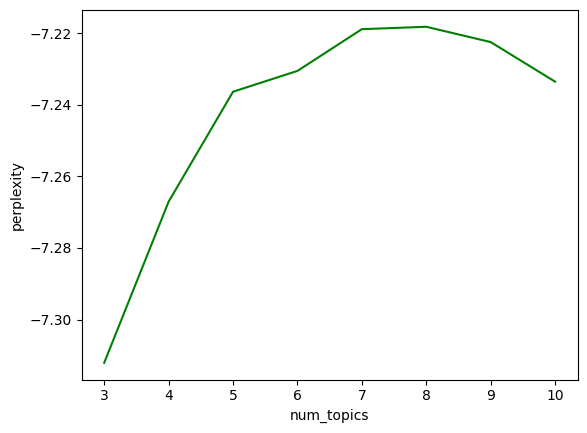

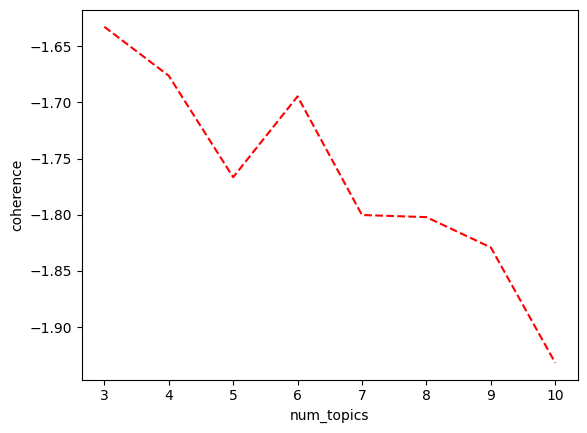

In [114]:
import matplotlib.pyplot as plt

plt.plot(iter_num, per_value, 'g-')
plt.xlabel("num_topics")
plt.ylabel("perplexity")
plt.show()

plt.plot(iter_num, coh_value, 'r--')
plt.xlabel("num_topics")
plt.ylabel("coherence")
plt.show()

**결과**

Perplexity가 가장 낮은 값은 num_topics = 3일 때 -7.312이다.

Coherence 값이 가장 높은 경우는 num_topics = 3일 때 -1.633이다.

Perplexity 값과 Coherence 값을 고려하여 topic 수를 6으로 정한다.

**test.csv**

topic = 6와 porterstemmer 사용

In [140]:
dt_test = pd.read_csv('test.csv',encoding= 'utf-8')
data_test = dt['ABSTRACT']

In [143]:
# 2. porterstemmer 사용
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

cachedStopWords = stopwords.words("english")
english_stops = set(stopwords.words('english'))  # 중복을 허용하지 않는 불용어 리스트

stemmer = PorterStemmer()

def tokenizer_porter_test(text):
    tokens = word_tokenize(text.lower())
    # 불용어 제거 및 어근 추출
    words = [stemmer.stem(word) for word in tokens if (word not in english_stops) and len(word) > 2]
    return ' '.join(words)

In [144]:
test_porter = [tokenizer_porter_test(doc) for doc in data_test]
test_porter = [doc.split() for doc in test_porter]
test_porter

[['predict',
  'model',
  'allow',
  'subject-specif',
  'infer',
  'analyz',
  'diseas',
  'relat',
  'alter',
  'neuroimag',
  'data',
  'given',
  'subject',
  'data',
  'infer',
  'made',
  'two',
  'level',
  'global',
  'i.e',
  'identifiy',
  'condit',
  'presenc',
  'subject',
  'local',
  'i.e',
  'detect',
  'condit',
  'effect',
  'individu',
  'measur',
  'extract',
  'subject',
  'data',
  'global',
  'infer',
  'wide',
  'use',
  'local',
  'infer',
  'use',
  'form',
  'subject-specif',
  'effect',
  'map',
  'rare',
  'use',
  'exist',
  'model',
  'often',
  'yield',
  'noisi',
  'detect',
  'compos',
  'dispers',
  'isol',
  'island',
  'articl',
  'propos',
  'reconstruct',
  'method',
  'name',
  'rsm',
  'improv',
  'subject-specif',
  'detect',
  'predict',
  'model',
  'approach',
  'particular',
  'binari',
  'classifi',
  'rsm',
  'specif',
  'aim',
  'reduc',
  'nois',
  'due',
  'sampl',
  'error',
  'associ',
  'use',
  'finit',
  'sampl',
  'exampl',
  'tra

In [145]:
# dictionary
dictionary_porter_test = Dictionary(test_porter)
print("# number of initial unique words in documents:", len(dictionary_porter_test))
dictionary_porter_test.filter_extremes(keep_n=10000, no_below = 8, no_above = 0.5) #자주 나오는 단어 10,000, 15회 미만 삭제, 전체 문서 50% 이상 등장 단어 제거(관사, 전치사)
print("# number of initial unique words in documents:", len(dictionary_porter_test))

# bag-of-words
corpus_porter_test = [dictionary_porter_test.doc2bow(doc) for doc in test_porter]
print('# number of documents %d' % len(corpus_porter_test))

# number of initial unique words in documents: 73230
# number of initial unique words in documents: 7804
# number of documents 20972


In [146]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# LDA 모델 학습
num_topics = 6  # 토픽 수
lda_model_porter_test = LdaModel(
    corpus=corpus_porter_test,
    id2word=dictionary_porter_test,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    iterations=50
)

# Perplexity 
perplexity = lda_model_porter_test.log_perplexity(corpus_porter_test)
print(f'Perplexity for {num_topics} topics: {perplexity:.4f}')

# Coherence 
coherence_model_porter_test = CoherenceModel(model=lda_model_porter_test, texts=test_porter, dictionary=dictionary_porter_test, coherence='u_mass')
coherence_porter_test = coherence_model_porter_test.get_coherence()
print(f'Coherence score for {num_topics} topics: {coherence_porter_test:.4f}')


Perplexity for 6 topics: -7.2440
Coherence score for 6 topics: -1.7073


**결과**

train일 때 perplexity는 -7.231, coherence는 -1.695가 나왔다.
test일 때 perplexity는 -7.2440, coherence는 -1.7073이 나왔다.

수치 상 유사하게 나왔으므로 모델이 잘 일반화 되었고 토픽 수가 적절하다.

2. 토픽별 Top-10 단어 및 그 분포를 시각화하기

In [130]:
from gensim.models import LdaModel

# 토픽별 Top-10 단어 출력
for idx, topic in lda_model_porter_test.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.012*"equat" + 0.012*"gener" + 0.010*"space" + 0.009*"group" + 0.008*"system" + 0.008*"theori" + 0.008*"result" + 0.007*"solut" + 0.007*"show" + 0.007*"use"
Topic 2: 0.009*"phase" + 0.009*"state" + 0.008*"magnet" + 0.007*"use" + 0.007*"system" + 0.007*"energi" + 0.007*"interact" + 0.007*"effect" + 0.007*"electron" + 0.006*"structur"
Topic 3: 0.020*"problem" + 0.015*"graph" + 0.014*"algorithm" + 0.013*"bound" + 0.012*"function" + 0.010*"optim" + 0.010*"result" + 0.010*"set" + 0.010*"show" + 0.010*"number"
Topic 4: 0.022*"model" + 0.019*"method" + 0.015*"learn" + 0.015*"use" + 0.014*"data" + 0.014*"propos" + 0.012*"network" + 0.010*"algorithm" + 0.009*"approach" + 0.008*"perform"
Topic 5: 0.012*"observ" + 0.010*"model" + 0.009*"mass" + 0.007*"use" + 0.007*"galaxi" + 0.007*"star" + 0.006*"measur" + 0.006*"cluster" + 0.005*"find" + 0.005*"data"
Topic 6: 0.012*"system" + 0.012*"network" + 0.012*"use" + 0.008*"data" + 0.008*"model" + 0.007*"paper" + 0.006*"inform" + 0.005*"user" + 

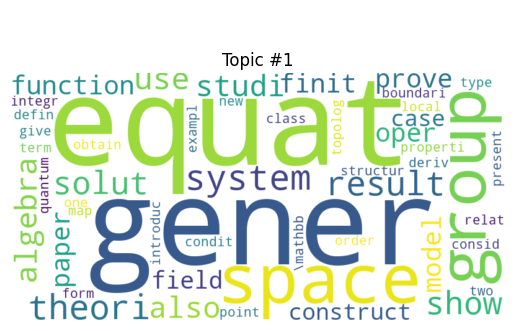

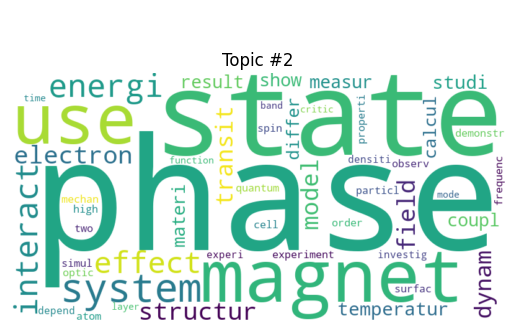

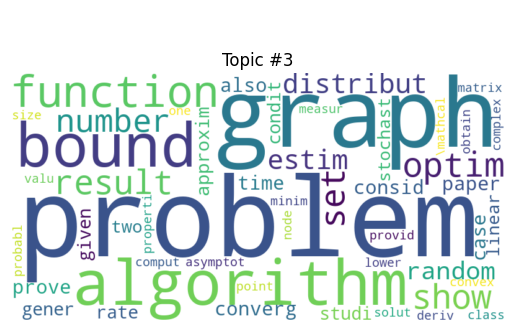

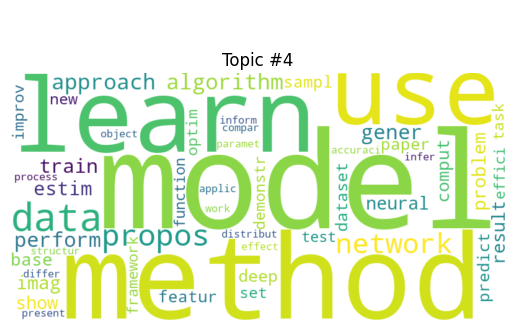

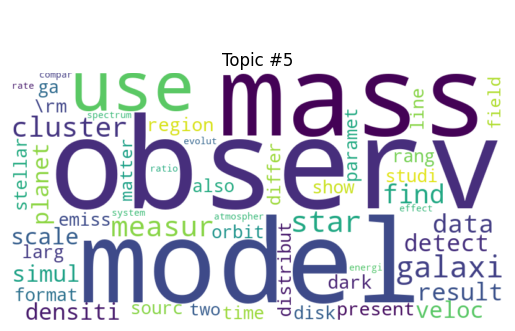

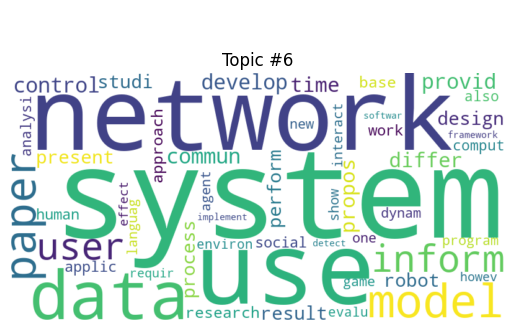

In [147]:
# 시각화1) Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

num_topics = 6

for i in range(num_topics):
    plt.figure()
    # ith topic에서 words와 weights 추출
    topic_words = {word: value for word, value in lda_model_porter_test.show_topic(i, topn=50)}
    
    # word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f' \n\nTopic #{i+1}')
    plt.show()

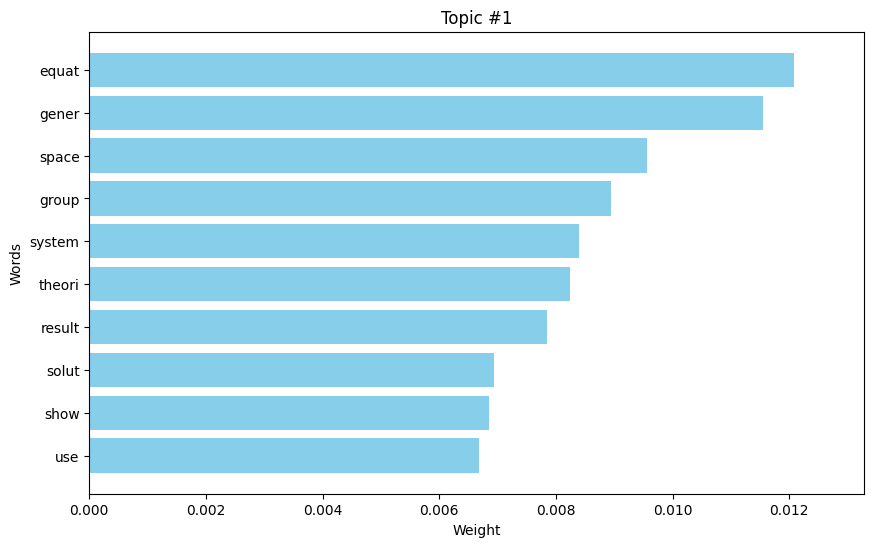

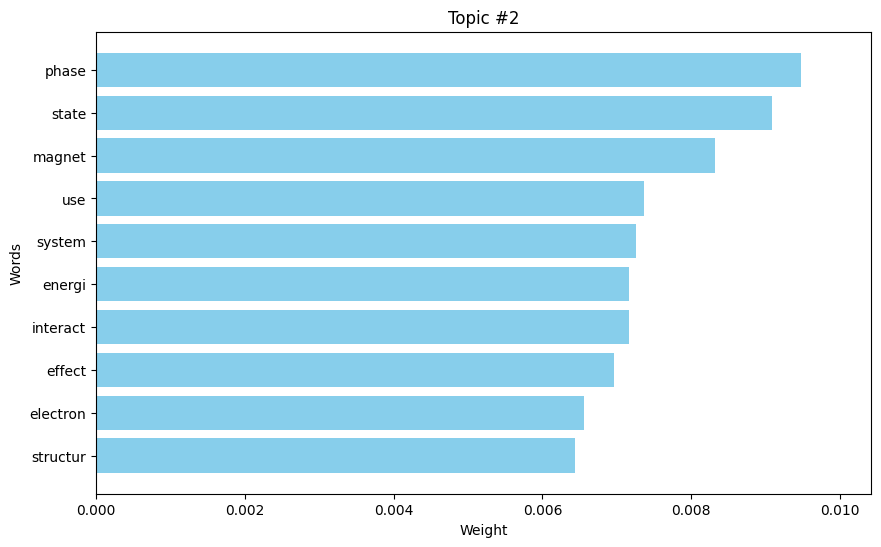

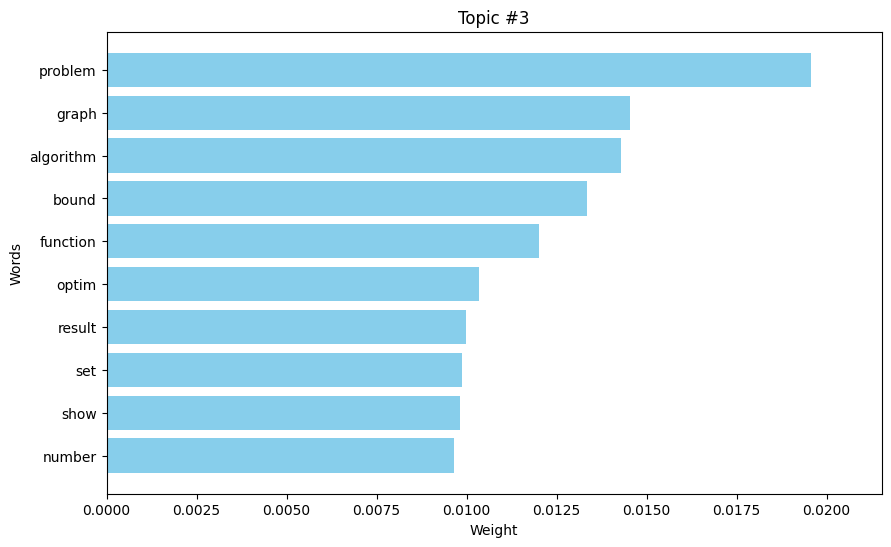

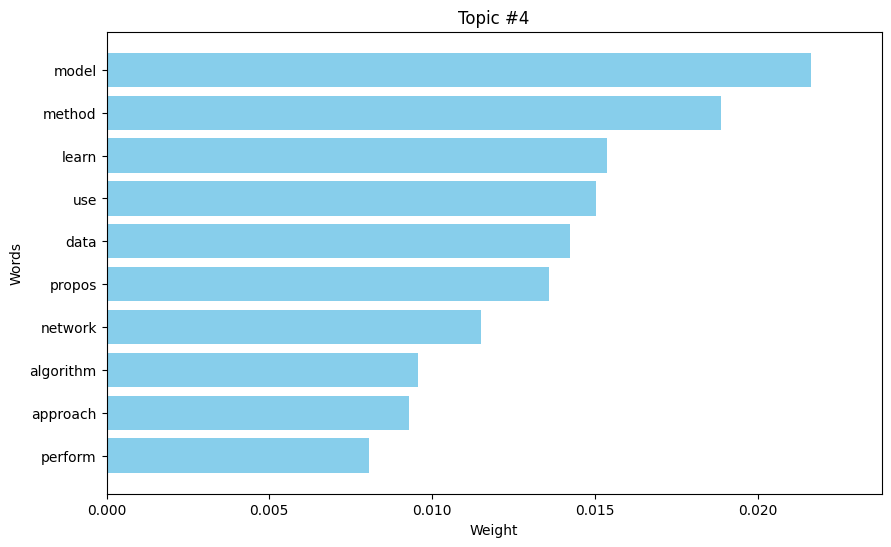

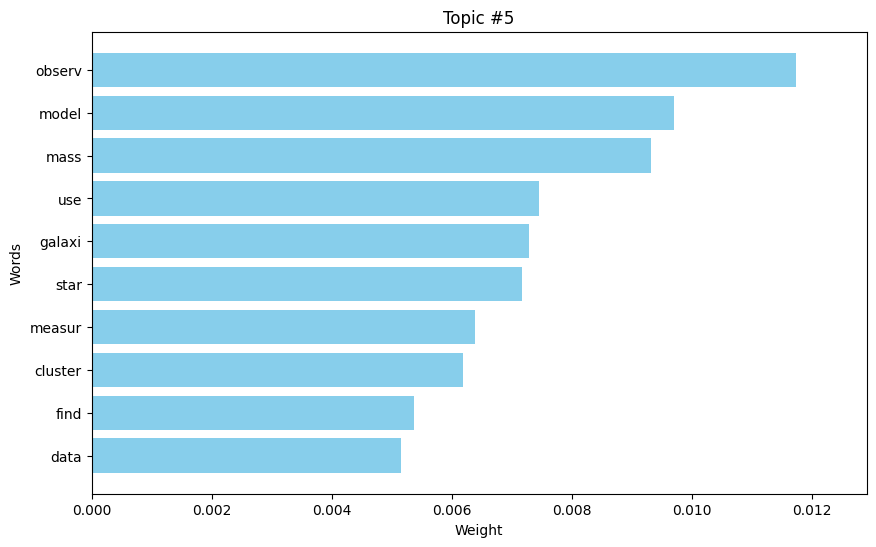

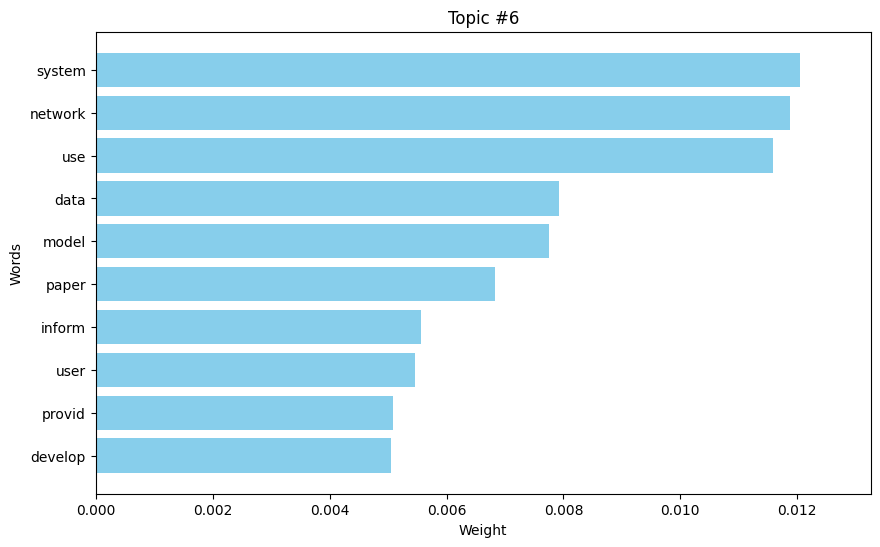

In [148]:
# 시각화2) 막대그래프
import matplotlib.pyplot as plt
import numpy as np

num_topics = 6

for i in range(num_topics):
    plt.figure(figsize=(10, 6))
    
    # ith topic에서 words와 weights 추출
    topic_words = lda_model_porter_test.show_topic(i, topn=10)  # 상위 10개 단어
    words, weights = zip(*topic_words)  # 단어와 가중치를 분리

    # 막대그래프 
    plt.barh(words, weights, color='skyblue')
    plt.xlabel('Weight')
    plt.ylabel('Words')
    plt.title(f'Topic #{i + 1}')
    plt.xlim(0, max(weights) * 1.1)  # x축의 범위를 늘림
    plt.gca().invert_yaxis()  # 단어 순서를 역순으로 표시
    plt.show()
